<a href="https://colab.research.google.com/github/EduardoAVS/LSTM-StockPrediction/blob/main/model_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance pytrends numpy pandas scikit-learn tensorflow


# 1) Coleta dos dados



a) Dados yfinance:

In [ ]:
import yfinance as yf
import pandas as pd

# Definir o ticker e o período
ticker = 'ITUB4.SA'
periodo = '5y'

# Baixar os dados
dados_acoes = yf.download(ticker, period=periodo)

# Exibir as primeiras linhas dos dados
dados_acoes


[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,ITUB4.SA,ITUB4.SA,ITUB4.SA,ITUB4.SA,ITUB4.SA,ITUB4.SA
Date,,,,,,
2019-11-06 00:00:00+00:00,29.714682,36.599998,37.360001,36.570000,37.099998,19030900
2019-11-07 00:00:00+00:00,29.893305,36.820000,36.950001,36.570000,36.779999,15689500
2019-11-08 00:00:00+00:00,29.446768,36.270000,36.779999,36.020000,36.360001,15088000
2019-11-11 00:00:00+00:00,29.576668,36.430000,36.799999,35.900002,36.200001,17480000
2019-11-12 00:00:00+00:00,29.073320,35.810001,36.290001,35.430000,36.020000,19644000
...,...,...,...,...,...,...
2024-10-31 00:00:00+00:00,35.002350,35.020000,35.610001,35.020000,35.250000,20077800
2024-11-01 00:00:00+00:00,34.810001,34.810001,35.299999,34.790001,35.000000,22751600


b) Dados do Google Trends:

In [ ]:
from pytrends.request import TrendReq

# Inicializar o pytrends
pytrends = TrendReq(hl='pt-BR', tz=0)

# Definir o termo de busca e o período
termo_busca = 'Itaú Unibanco'
pytrends.build_payload([termo_busca], cat=0, timeframe='today 5-y', geo='BR', gprop='')

# Obter dados de interesse ao longo do tempo
dados_trends = pytrends.interest_over_time()

# Exibir as primeiras linhas dos dados
dados_trends


/usr/local/lib/python3.10/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


,Itaú Unibanco,isPartial
date,,
2019-11-03,32,False
2019-11-10,23,False
2019-11-17,23,False
2019-11-24,16,False
2019-12-01,22,False
...,...,...
2024-10-06,35,False
2024-10-13,41,False
2024-10-20,36,False


In [ ]:
print(dados_acoes.shape)
dados_acoes.isnull().sum()

(1245, 6)


,,0
Price,Ticker,
Adj Close,ITUB4.SA,0
Close,ITUB4.SA,0
High,ITUB4.SA,0
Low,ITUB4.SA,0
Open,ITUB4.SA,0
Volume,ITUB4.SA,0


# 2) Pré-processamento dos Dados

a) Combinar Dados:

In [ ]:
# Remover a coluna 'isPartial' dos dados do Google Trends
#dados_trends = dados_trends.drop(columns=['isPartial'])

# Combinar os dados com base na data
#dados_combinados = pd.merge(dados_acoes, dados_trends, left_index=True, right_index=True)

# Exibir as primeiras linhas dos dados combinados
#print(dados_combinados.head())


b) Criação de Variável Alvo:

In [ ]:


# Remover linhas com valores NaN
dados_acoes = dados_acoes.dropna()
dados_acoes = dados_acoes.drop_duplicates()

# Exibir as primeiras linhas dos dados processados
print(dados_acoes.head())


Price                      Adj Close      Close       High        Low  \
Ticker                      ITUB4.SA   ITUB4.SA   ITUB4.SA   ITUB4.SA   
Date                                                                    
2019-11-06 00:00:00+00:00  29.714682  36.599998  37.360001  36.570000   
2019-11-07 00:00:00+00:00  29.893305  36.820000  36.950001  36.570000   
2019-11-08 00:00:00+00:00  29.446768  36.270000  36.779999  36.020000   
2019-11-11 00:00:00+00:00  29.576668  36.430000  36.799999  35.900002   
2019-11-12 00:00:00+00:00  29.073320  35.810001  36.290001  35.430000   

Price                           Open    Volume  
Ticker                      ITUB4.SA  ITUB4.SA  
Date                                            
2019-11-06 00:00:00+00:00  37.099998  19030900  
2019-11-07 00:00:00+00:00  36.779999  15689500  
2019-11-08 00:00:00+00:00  36.360001  15088000  
2019-11-11 00:00:00+00:00  36.200001  17480000  
2019-11-12 00:00:00+00:00  36.020000  19644000  


# 3) Divisão dos Dados em Treinamento e Teste

# Treinamento e avaliação do modelo

In [ ]:
# Importing required libraries for LSTM model
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
dados_acoes.columns

MultiIndex([('Adj Close', 'ITUB4.SA'),
            (    'Close', 'ITUB4.SA'),
            (     'High', 'ITUB4.SA'),
            (      'Low', 'ITUB4.SA'),
            (     'Open', 'ITUB4.SA'),
            (   'Volume', 'ITUB4.SA')],
           names=['Price', 'Ticker'])

### 3) Preparação dos Dados para o Modelo LSTM

In [ ]:
# Selecionar a coluna 'Close' como a série temporal alvo
dados_acoes = dados_acoes[['Close']].dropna()

# Escalar os dados entre 0 e 1 para o LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
dados_escalados = scaler.fit_transform(dados_acoes)

# Dividir os dados em sequências para o LSTM
def criar_sequencias(data, seq_length=60):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length, 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

# Criar sequências de treinamento, validação e teste futuro
sequence_length = 60  # Número de dias na sequência
X, y = criar_sequencias(dados_escalados, sequence_length)

# Redimensionar X para [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Calcular tamanhos dos conjuntos de treino, validação e teste futuro
train_size = int(len(X) * 0.6)       # 60% para treino
val_size = int(len(X) * 0.2)          # 20% para validação
test_size = len(X) - train_size - val_size  # 20% restantes para teste futuro

# Dividir os conjuntos de dados
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:train_size + val_size], y[train_size:train_size + val_size]
X_future_test, y_future_test = X[train_size + val_size:], y[train_size + val_size:]

# Verificar os tamanhos dos conjuntos
print(f"Tamanho de X_train: {X_train.shape}, Tamanho de X_val: {X_test.shape}, Tamanho de X_future_test: {X_future_test.shape}")
print(f"Tamanho de y_train: {y_train.shape}, Tamanho de y_val: {y_test.shape}, Tamanho de y_future_test: {y_future_test.shape}")


Tamanho de X_train: (711, 60, 1), Tamanho de X_val: (237, 60, 1), Tamanho de X_future_test: (237, 60, 1)
Tamanho de y_train: (711,), Tamanho de y_val: (237,), Tamanho de y_future_test: (237,)


In [ ]:
dados_acoes

Price,Close
Ticker,ITUB4.SA
Date,
2019-11-06 00:00:00+00:00,36.599998
2019-11-07 00:00:00+00:00,36.820000
2019-11-08 00:00:00+00:00,36.270000
2019-11-11 00:00:00+00:00,36.430000
2019-11-12 00:00:00+00:00,35.810001
...,...
2024-10-31 00:00:00+00:00,35.020000
2024-11-01 00:00:00+00:00,34.810001


### 4) Construção e Treinamento do Modelo LSTM

In [ ]:

# Construir o modelo LSTM
model = Sequential([
    LSTM(10, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3), # Faz o modelo esquecer 30% das informações evitando overfitting
    Dense(5),
    Dense(1)
])

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=32, callbacks=[early_stopping])


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0908 - val_loss: 0.0053
Epoch 2/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0173 - val_loss: 0.0032
Epoch 3/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0101 - val_loss: 0.0029
Epoch 4/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0095 - val_loss: 0.0022
Epoch 5/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0082 - val_loss: 0.0022
Epoch 6/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0072 - val_loss: 0.0023
Epoch 7/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0070 - val_loss: 0.0021
Epoch 8/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0062 - val_loss: 0.0017
Epoch 9/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0058 - val_loss: 0.0020
Epoch 10/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0063 - val_loss: 0.0014
Epoch 11/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0053 - val_loss: 0.0017
Epoch 12/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0052 - val_l

### 5) Avaliação do Modelo e Previsões

Train Loss: 0.0029
Test Loss: 0.0012
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


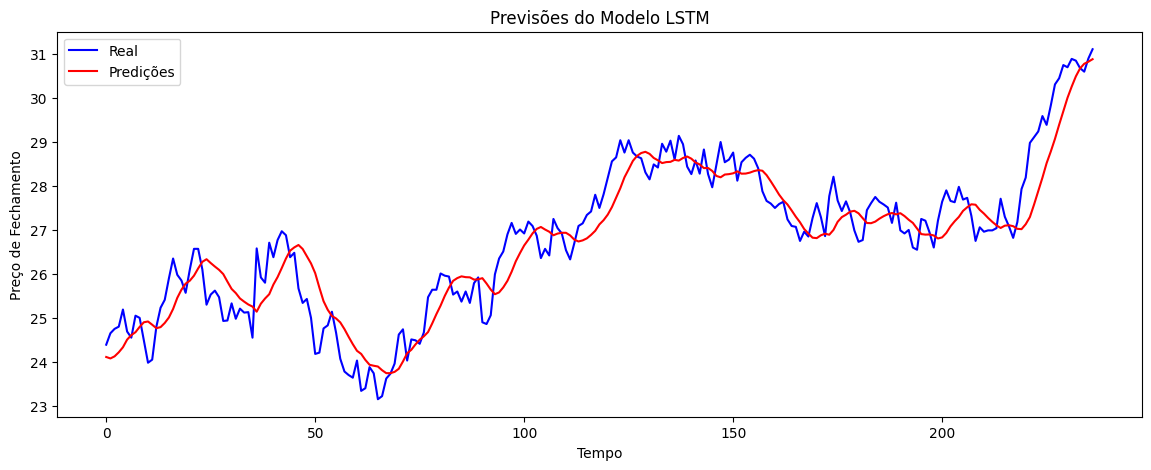

In [ ]:

# Avaliar o modelo nos dados de teste
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Train Loss: {train_loss:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Fazer previsões
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Reverter a escala

# Reverter escala dos dados reais para comparação
y_test_inverso = scaler.inverse_transform(y_test.reshape(-1, 1))

# Exibir as primeiras previsões vs valores reais
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(y_test_inverso, color='blue', label='Real')
plt.plot(predictions, color='red', label='Predições')
plt.title('Previsões do Modelo LSTM')
plt.xlabel('Tempo')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.show()


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


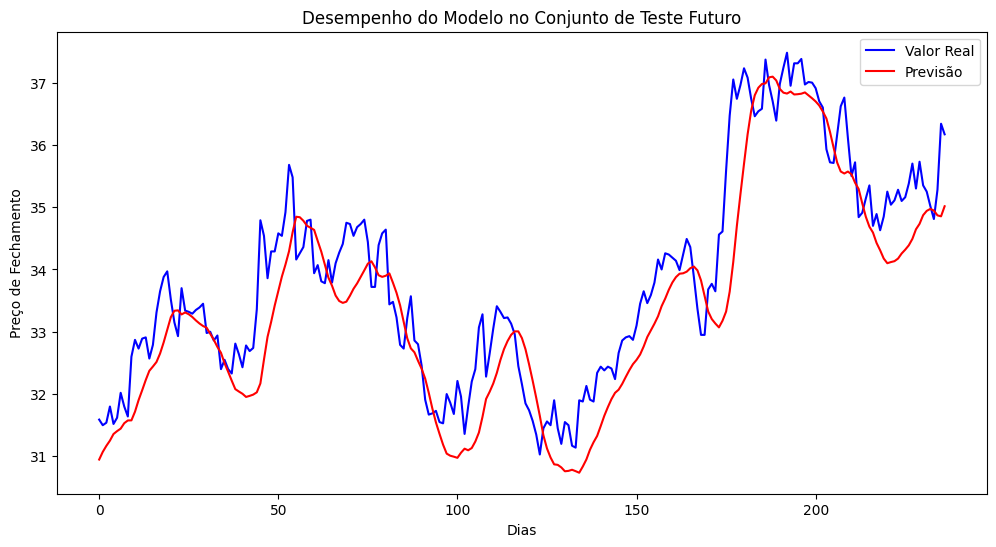

In [ ]:
# Prever valores no conjunto de teste futuro
y_pred_future = model.predict(X_future_test)

# Reverter a escala para obter os valores reais
y_future_test_inverso = scaler.inverse_transform(y_future_test.reshape(-1, 1))
y_pred_future_inverso = scaler.inverse_transform(y_pred_future)

# Plotar o gráfico com os valores reais e previstos
plt.figure(figsize=(12, 6))
plt.plot(y_future_test_inverso, color='blue', label='Valor Real')
plt.plot(y_pred_future_inverso, color='red', label='Previsão')
plt.xlabel('Dias')
plt.ylabel('Preço de Fechamento')
plt.title('Desempenho do Modelo no Conjunto de Teste Futuro')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_test_inverso = scaler.inverse_transform(y_test.reshape(-1, 1))
predicitions = scaler.inverse_transform(predictions.reshape(-1, 1))

# Calculando o Mean Squared Error (MSE)
mse = mean_squared_error(y_test_inverso, predictions)
print(f"Mean Squared Error (MSE): {mse}")

# Calculando o Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculando o Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_inverso, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculando o R-squared (R²)
r2 = r2_score(y_test_inverso, predictions)
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 0.37500386545850567
Root Mean Squared Error (RMSE): 0.6123755918213148
Mean Absolute Error (MAE): 0.499917066549953
R-squared (R²): 0.872755001979899


In [ ]:
# Calculando o Mean Squared Error (MSE)
mse = mean_squared_error(y_future_test_inverso, y_pred_future_inverso)
print(f"Mean Squared Error (MSE): {mse}")

# Calculando o Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculando o Mean Absolute Error (MAE)
mae = mean_absolute_error(y_future_test_inverso, y_pred_future_inverso)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculando o R-squared (R²)
r2 = r2_score(y_future_test_inverso, y_pred_future_inverso)
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 0.6163978187653999
Root Mean Squared Error (RMSE): 0.7851100679302233
Mean Absolute Error (MAE): 0.6285184546361996
R-squared (R²): 0.7791279981913324


In [ ]:
# Parâmetro de sequência (por exemplo, janela de 60 dias)
sequence_length = 1245

# Obter a última sequência para fazer a previsão do próximo fechamento
ultima_sequencia = dados_escalados[-sequence_length:]
ultima_sequencia = np.reshape(ultima_sequencia, (1, sequence_length, 1))

# Fazer a previsão do próximo valor
previsao = model.predict(ultima_sequencia)

# Reverter a escala para obter o valor original do fechamento
previsao_dia_seguinte = scaler.inverse_transform(previsao)

# Exibir a previsão
print(f"Previsão para o fechamento de amanhã: {previsao_dia_seguinte[0][0]:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
Previsão para o fechamento de amanhã: 35.1701
